<a href="https://colab.research.google.com/github/Akanerd/Orbit-Archieve/blob/main/Day%2014%20-%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
NB_CLASSES = 10
RESHAPED = 784

mnist = keras.datasets.mnist
(X_train,Y_train), (X_test,Y_test)=mnist.load_data()

#X_train berdimensi 60000 baris data berukuran masing masing 28X28; Kita ubah bentuknya menjadi 60000X784, gambar berdimensi 28X28 dijadikan
#satu dimensi berukuran 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Normalize data dari 0-255 to 0-1
X_train, X_test = X_train/255.0, X_test/255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train,NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test,NB_CLASSES)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
from os import name
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,input_shape=(RESHAPED,),kernel_initializer='zeros',name='dense_layer',activation='softmax'))
model.summary()
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT = 0.2

model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test Accuracy : ',test_acc)

Epoch 1/50
375/375 [==============================] - 3s 6ms/step - loss: 1.3528 - accuracy: 0.7680 - val_loss: 0.8780 - val_accuracy: 0.8438
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.7803 - accuracy: 0.8417 - val_loss: 0.6478 - val_accuracy: 0.8644
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.6349 - accuracy: 0.8575 - val_loss: 0.5552 - val_accuracy: 0.8737
Epoch 4/50
375/375 [==============================] - 3s 7ms/step - loss: 0.5645 - accuracy: 0.8658 - val_loss: 0.5034 - val_accuracy: 0.8813
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.5216 - accuracy: 0.8721 - val_loss: 0.4702 - val_accuracy: 0.8861
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.4921 - accuracy: 0.8766 - val_loss: 0.4465 - val_accuracy: 0.8895
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4702 - accuracy: 0.8802 - val_loss: 0.4290 - val_accuracy: 0.8912
Epoch 

Sigmoid activation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

<function matplotlib.pyplot.show>

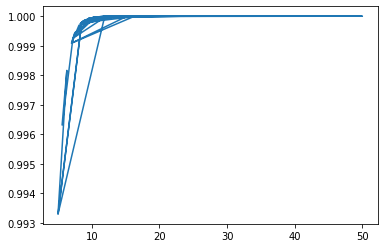

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
import numpy as np

boston=load_boston()
x=boston.target

y=(1/(1+np.exp(-x)))

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show

tanh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

<function matplotlib.pyplot.show>

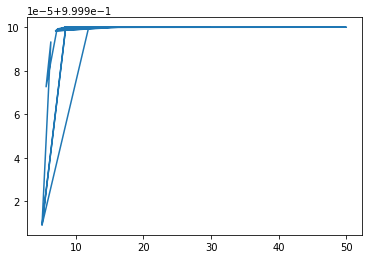

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
import numpy as np

boston=load_boston()
x=boston.target

y=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show

Multi-layer Neural Network

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [ ]:
mnist=keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train_sample')
print(X_test.shape[0], 'test_sample')

Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(RESHAPED,),
                             name='dense_layer1',activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer2',activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer3',activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer4',activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer5',activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES,
                             name='dense_layer6',activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

In [ ]:
test_loss,test_acc = model.evaluate(X_test,Y_test)

print('Test accuracy', test_acc)